In [18]:

# Basic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Other libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Machine Learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [19]:
dataset = pd.read_csv('./heart.csv')

### Data Processing

In [24]:
# Create dummies for categorical variables in order to quantify them.
dataset = pd.get_dummies(dataset, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
# Scale variables so they all have the same range. This standardization is important for modeling.
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [27]:
y = dataset['target']
# Remove target column from training data
X = dataset.drop(['target'], axis = 1)
# Separate test data from training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [28]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

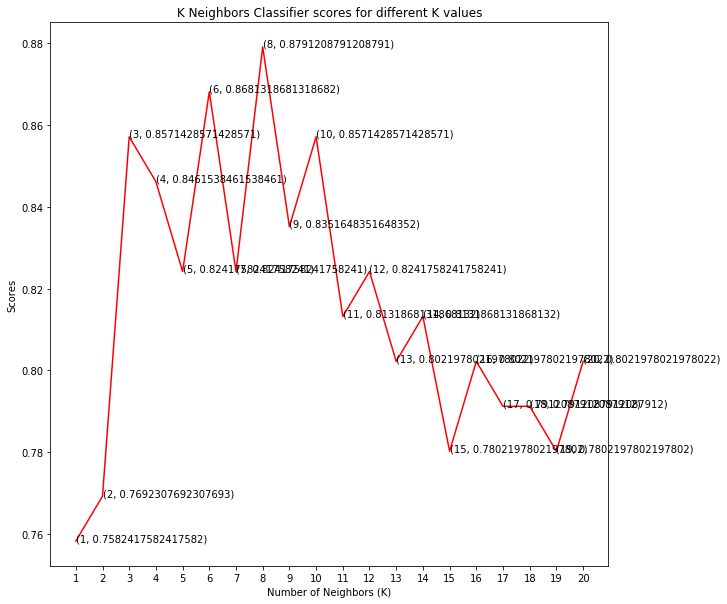

In [29]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [30]:
Xnew = pd.read_csv('./heart.csv')
# Drop target column
Xnew = Xnew.drop('target', axis=1)

In [31]:
# Create dummies for categorical variables in order to quantify them.
Xnew = pd.get_dummies(Xnew, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [32]:
# Scale variables so they all have the same range. This standardization is important for modeling.
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
Xnew[columns_to_scale] = standardScaler.fit_transform(Xnew[columns_to_scale])

In [33]:
Xsample = Xnew.loc[[18]]

In [34]:
knn_classifier.predict(Xsample)

array([1])

In [35]:
knn_classifier

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=20, p=2,
           weights='uniform')

## Train a new model using the entire dataset with k=8 neighbors


In [36]:
knn_classifier_fullset = KNeighborsClassifier(n_neighbors = 8)
knn_classifier_fullset.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='uniform')

## Pickle model

In [37]:
!pip install dill

You should consider upgrading via the 'pip install --upgrade pip' command.


In [38]:
import sys

In [39]:
sys.path.append("/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages")

In [40]:
import dill as pickle

In [41]:
filename = 'model_v1.pk'

In [42]:
with open('./flask_api/models/'+filename, 'wb') as file:
	pickle.dump(knn_classifier_fullset, file)

## Export as HDF5

In [65]:
!pip install h5py

  Using cached https://files.pythonhosted.org/packages/80/c5/eec74d7324628f1b640c6e706981c4ed51afcaa1656ece26cb08d862598e/h5py-2.9.0-cp37-cp37m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/73/fb/00a976f728d0d1fecfe898238ce23f502a721c0ac0ecfedb80e0d88c64e9/six-1.12.0-py2.py3-none-any.whl
You should consider upgrading via the 'pip install --upgrade pip' command.


In [68]:
import h5py

In [74]:
f = knn_classifier_fullset

In [75]:
f = h5py.File("my_model.hdf5", "w")

## Load and test pickled model

In [44]:
with open('./flask_api/models/'+filename ,'rb') as f:
    loaded_model = pickle.load(f)


In [45]:
loaded_model.predict(test_df)

NameError: name 'test_df' is not defined

In [46]:
print(X)

          age  trestbps      chol   thalach   oldpeak  sex_0  sex_1  cp_0  \
0    0.952197  0.763956 -0.256334  0.015443  1.087338      0      1     0   
1   -1.915313 -0.092738  0.072199  1.633471  2.122573      0      1     0   
2   -1.474158 -0.092738 -0.816773  0.977514  0.310912      1      0     0   
3    0.180175 -0.663867 -0.198357  1.239897 -0.206705      0      1     0   
4    0.290464 -0.663867  2.082050  0.583939 -0.379244      1      0     1   
5    0.290464  0.478391 -1.048678 -0.072018 -0.551783      0      1     1   
6    0.180175  0.478391  0.922521  0.146634  0.224643      1      0     0   
7   -1.143291 -0.663867  0.323431  1.021244 -0.896862      0      1     0   
8   -0.260980  2.306004 -0.913400  0.540209 -0.465514      0      1     0   
9    0.290464  1.049520 -1.512490  1.064975  0.483451      0      1     0   
10  -0.040403  0.478391 -0.140381  0.452748  0.138373      0      1     1   
11  -0.702136 -0.092738  0.555337 -0.465593 -0.724323      1      0     0   

In [59]:
X_1 = X.iloc[4:5]

In [60]:
print(X_1)

        age  trestbps     chol   thalach   oldpeak  sex_0  sex_1  cp_0  cp_1  \
4  0.290464 -0.663867  2.08205  0.583939 -0.379244      1      0     1     0   

   cp_2   ...    slope_2  ca_0  ca_1  ca_2  ca_3  ca_4  thal_0  thal_1  \
4     0   ...          1     1     0     0     0     0       0       0   

   thal_2  thal_3  
4       1       0  

[1 rows x 30 columns]


In [64]:
loaded_model.predict(X_1)

array([1])

## Create Flask API 